# **Challenge #6: Building and Training a Simple Feedforward Neural Network with Keras**  
#### **Topic**: Train a Basic **Feedforward Neural Network (FNN)** using the **Keras Sequential API**

---

### **Problem Description**:
In this challenge, you will build, train, and evaluate a **simple feedforward neural network (FNN)** using **TensorFlow's Keras Sequential API**. The goal is to classify data from the **Iris dataset**, a classic dataset for **multi-class classification**.

Your tasks include:

1. **Load and preprocess the Iris dataset** using **TensorFlow Datasets (TFDS)** or **Scikit-learn**.
2. **Build a simple FNN** with the following architecture:
   - **Input layer**: Accepts **4 features**.
   - **Hidden layer**: **Dense** layer with **16 neurons** and **ReLU activation**.
   - **Output layer**: **Dense** layer with **3 neurons** and **softmax activation** for **multi-class classification**.

3. **Compile the model** with:
   - **Loss function**: `sparse_categorical_crossentropy`
   - **Optimizer**: `adam`
   - **Metrics**: `accuracy`

4. **Train the model** using **80% of the data** for **training** and **20% for validation**.
5. **Evaluate the model** on the **validation set** and display the **accuracy**.

---

### **Constraints**:
- Use only **TensorFlow and Keras** libraries (`tf.keras.models`, `tf.keras.layers`, `tf.keras.datasets`, etc.).
- The model should be trained for **at least 50 epochs**.
- Ensure the **data is normalized** before training.

---

### **Example Input & Output**

#### **Example 1: Building and Compiling the Model**  
##### **Input**:
```python
# Define a simple FNN model using the Keras Sequential API
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(4,)),
    keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
```
##### **Expected Output**:
```
Model built and compiled successfully.
```

---

#### **Example 2: Training the Model**  
##### **Input**:
```python
# Given preprocessed training data (X_train, y_train)
# Train the model for 50 epochs
model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))
```
##### **Expected Output**:
```
Epoch 50/50
5/5 [==============================] - 0s 10ms/step - loss: 0.1204 - accuracy: 0.9667 - val_loss: 0.1345 - val_accuracy: 0.9333
```

---

#### **Example 3: Evaluating the Model**  
##### **Input**:
```python
# Evaluate the model on the validation set
loss, accuracy = model.evaluate(X_val, y_val)
```
##### **Expected Output**:
```
Validation Accuracy: 0.93
```

---

### **Hints**:
- Use **`train_test_split`** from **Scikit-learn** to split data into **training and validation sets**.
- Use **`MinMaxScaler`** or **`StandardScaler`** for **feature normalization**.
- **EarlyStopping** can be added to avoid **overfitting** if needed.

---

This challenge will help you learn how to **build**, **train**, and **evaluate** a basic **neural network** using the **Keras Sequential API**, a fundamental skill for **deep learning** with **TensorFlow**. Let me know if you need any further details! 🚀

# Solution

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# 1. Load and Preprocess the Iris Dataset**

# Load the Iris dataset from scikit-learn
iris = load_iris()
X = iris.data  # Features: 4 attributes of the iris flower
y = iris.target  # Labels: 3 classes of iris species

In [3]:
# Normalize the feature data using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

---

### **When to Use `StandardScaler` vs. Other Scalers**

| **Scaler**              | **Use Case**                                                                      | **Capability**                  |
|-------------------------|-----------------------------------------------------------------------------------|---------------------------------------|
| **StandardScaler**      | When data follows a **normal distribution**; works well with **SVM**, **Logistic Regression**, **Neural Networks**. | converts data to z-scores (mean = 0, std = 1). |
| **MinMaxScaler**        | When features have different scales but not necessarily normal distribution. Use when you need **bounded data** (e.g., 0 to 1) for **neural networks**. | scales to a range (default 0 to 1). |
| **RobustScaler**        | When data contains **outliers**. It uses the **median** and **interquartile range** for scaling. | robust to outliers. |
| **MaxAbsScaler**        | When data is **sparse** (many **zeroes**), and you need to preserve **sparsity**. | scales by the **maximum absolute value**. |
| **Normalizer**          | When you need to **normalize each sample** individually, often used for **text classification** or **cosine similarity**. | scales data by its **L2 norm**. |

- **Conclusion**: Use `StandardScaler` for normally distributed data, but consider other scalers based on **data distribution** and **model requirements**.
---

In [4]:
# Split the dataset into 80% training and 20% validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

---

### **Why No Test Set?**

- Typically, data is split into:
  - **Training Set**: To **train the model**.
  - **Validation Set**: To **tune hyperparameters** and prevent **overfitting**.
  - **Test Set**: To evaluate the **final model** on **unseen data**.
- The **test set** should be used **only once** to **avoid bias**. 
- In this challenge, a **test set was not included** for **simplicity**, but in **real-world scenarios**, it is recommended to include one.

---

In [5]:
# 2. Building the Feedforward Neural Network (FNN)

# Define the Model Using Keras Sequential API
model = keras.Sequential([
    keras.layers.InputLayer(shape=(4,)),  # Input layer
    keras.layers.Dense(16, activation='relu'),  # Hidden layer
    keras.layers.Dense(3, activation='softmax') # Output layer
])

---
### **Guide on When to Use Which Activation Function**

| **Activation Function** | **When to Use**                                           | **Characteristics**                                        |
|-------------------------|-----------------------------------------------------------|------------------------------------------------------------|
| **ReLU**                | **Hidden layers** in **deep learning models**.             | **Non-linear**, helps with **vanishing gradient** problem.  |
| **Leaky ReLU**          | When **ReLU** is causing **dead neurons** (outputs zero).  | Allows **small gradient** when input < 0.                   |
| **Sigmoid**             | **Binary classification** problems in **output layer**.    | **Squashes values** between 0 and 1, can suffer from **vanishing gradients**. |
| **Softmax**             | **Multi-class classification** (mutually exclusive classes).| Converts logits to **probabilities**.                        |
| **Tanh**                | When data is **centered around zero**, alternative to **sigmoid**. | Squashes between **-1** and **1**, can still cause **vanishing gradients**. |
| **ELU** (Exponential Linear Unit) | When **ReLU** performance is poor.               | Similar to ReLU, but with **negative values**.              |
| **Linear**              | **Regression tasks**, especially in the **output layer**.  | No transformation, outputs the **raw value**.               |

---

In [6]:
# Compile the model
model.compile(
    optimizer='adam',  # Adam optimizer (adaptive learning rate)
    loss='sparse_categorical_crossentropy',  # Suitable for multi-class classification with integer labels
    metrics=['accuracy']  # To track the accuracy during training and validation
)

---
### **Guide on When to Use Which Optimizer**

| **Optimizer**           | **When to Use**                                           | **Characteristics**                                        |
|-------------------------|-----------------------------------------------------------|------------------------------------------------------------|
| **SGD** (Stochastic Gradient Descent) | When training **simple models** or when **data is not too large**. | Can get **stuck in local minima**, use **momentum** to improve. |
| **Adam**                | Default choice for **most neural networks**.               | Combines **RMSprop** and **Momentum**, adaptive learning rate. |
| **RMSprop**             | **Recurrent Neural Networks (RNNs)**.                      | Good for **non-stationary objectives**.                      |
| **Adagrad**             | When features have **different frequencies**.              | Adapts learning rate for **each parameter**.                 |
| **Adadelta**            | **Extension of Adagrad**, reduces **learning rate decay**. | Useful for **sparse data**.                                  |
| **Adamax**              | When **Adam** does not converge, particularly with **large gradients**. | Variation of Adam with **infinity norm**.                    |
| **Nadam**               | Combines **Adam** with **Nesterov momentum**.              | Faster convergence in some scenarios.                        |

---

### **Guide on When to Use Which Loss Function**

| **Loss Function**                     | **When to Use**                                           | **Use Case Example**                                          |
|-------------------------------------|-----------------------------------------------------------|-------------------------------------------------------------|
| **Mean Squared Error (MSE)**         | **Regression tasks**, predicting continuous values.        | **House prices**, **temperature prediction**.                |
| **Mean Absolute Error (MAE)**        | When outliers are present in **regression tasks**.         | Similar to MSE but **less sensitive** to outliers.           |
| **Sparse Categorical Crossentropy**  | **Multi-class classification** with **integer labels**.    | **Iris dataset**, **MNIST dataset**.                         |
| **Categorical Crossentropy**         | Multi-class classification with **one-hot encoded labels**.| **Image classification** with **one-hot vectors**.           |
| **Binary Crossentropy**              | **Binary classification** problems.                        | **Spam vs. Not Spam**, **Yes/No** problems.                  |
| **Huber Loss**                       | When you want a mix of **MSE** and **MAE**.                | **Regression** with **some outliers**.                       |
| **KLDivergence**                     | When comparing **probability distributions**.              | **Anomaly detection**, **probabilistic models**.             |

---

In [7]:
# 3. Training the Model

# Fit the Model to the Training Data
history = model.fit(
    X_train, y_train,  # Training data and labels
    epochs=50,  # Number of training epochs
    validation_data=(X_val, y_val),  # Validation data
    verbose=2  # Display training progress
)

Epoch 1/50
4/4 - 2s - 510ms/step - accuracy: 0.5667 - loss: 0.9945 - val_accuracy: 0.5667 - val_loss: 0.9782
Epoch 2/50
4/4 - 0s - 31ms/step - accuracy: 0.6083 - loss: 0.9663 - val_accuracy: 0.6333 - val_loss: 0.9504
Epoch 3/50
4/4 - 0s - 41ms/step - accuracy: 0.6417 - loss: 0.9384 - val_accuracy: 0.6333 - val_loss: 0.9244
Epoch 4/50
4/4 - 0s - 39ms/step - accuracy: 0.6750 - loss: 0.9123 - val_accuracy: 0.6667 - val_loss: 0.9000
Epoch 5/50
4/4 - 0s - 36ms/step - accuracy: 0.6667 - loss: 0.8881 - val_accuracy: 0.7000 - val_loss: 0.8764
Epoch 6/50
4/4 - 0s - 39ms/step - accuracy: 0.6667 - loss: 0.8639 - val_accuracy: 0.7333 - val_loss: 0.8537
Epoch 7/50
4/4 - 0s - 37ms/step - accuracy: 0.7167 - loss: 0.8409 - val_accuracy: 0.7667 - val_loss: 0.8321
Epoch 8/50
4/4 - 0s - 35ms/step - accuracy: 0.7250 - loss: 0.8190 - val_accuracy: 0.8000 - val_loss: 0.8114
Epoch 9/50
4/4 - 0s - 30ms/step - accuracy: 0.7667 - loss: 0.7990 - val_accuracy: 0.8000 - val_loss: 0.7917
Epoch 10/50
4/4 - 0s - 31ms

---
### **Deciding on the Number of Epochs and Verbose**

- **Epochs**: Start with a **baseline (e.g., 50)**, monitor **training and validation loss**. 
  - Use **EarlyStopping** to **automatically stop** if **no improvement** is seen.
- **Verbose**:
  - `verbose=0`: **Silent mode**.
  - `verbose=1`: Displays **progress bar**.
  - `verbose=2`: Displays **one line per epoch** (good for **remote logs**).

---

In [8]:
# 4. Evaluating the Model
# Evaluate the model's performance on the validation data
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {accuracy:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.7667 - loss: 0.4438
Validation Accuracy: 0.77


---
### **Why Use `accuracy` as the Metric Instead of `loss`?**

- **Loss** indicates how well the model's **predicted values** match the **true values** during **training**.
- **Accuracy** is more **interpretable** for **classification tasks**, showing the **percentage of correct predictions**.
- **Other Metrics** to Consider:
  - **Precision and Recall**: When dealing with **imbalanced datasets**.
  - **F1 Score**: Balance between **precision and recall**.
  - **AUC-ROC**: Useful for **binary classification** to evaluate **true positive rate** vs. **false positive rate**.

---

Text(0.5, 1.0, 'Training and Validation Accuracy over Epochs')

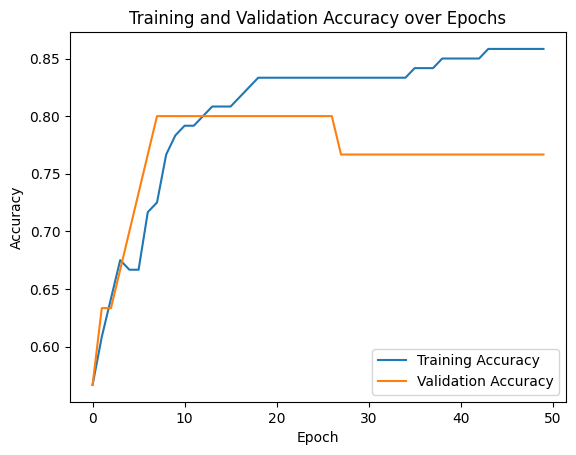

In [9]:
# 5. Visualizing the Training Process
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy over Epochs')

Text(0.5, 1.0, 'Training and Validation Loss over Epochs')

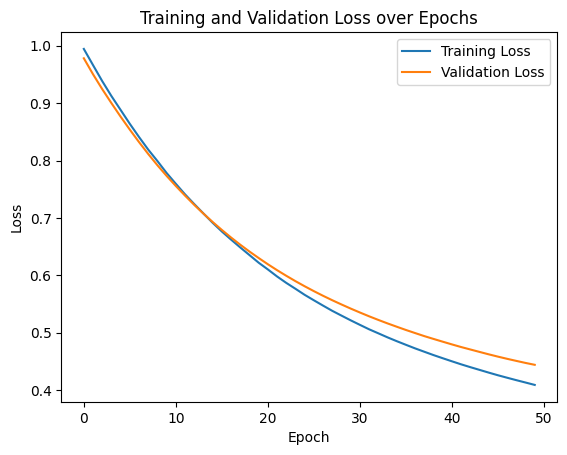

In [10]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss over Epochs')

---
### **Why Is Validation Loss Higher Than Training Loss?**

- Indicates **slight overfitting**.
- Overfitting occurs when a model performs **well on the training data** but **poorly on unseen data**.
- This is indicated by the **validation loss being higher than the training loss**, as seen in the previous plot.

---

### **Techniques to Prevent Overfitting**

| **Method**                    | **Description**                                                        |
|-------------------------------|------------------------------------------------------------------------|
| **EarlyStopping**             | Stop training when **validation loss** no longer improves.             |
| **Dropout Layers**            | Randomly **disable neurons** during training to improve **generalization**. |
| **Regularization** (`L1/L2`)  | Apply **penalties** to model weights to **reduce complexity**.         |
| **Data Augmentation**         | Generate **more training data** by applying **transformations**.       |
| **Reduce Model Complexity**   | Decrease the **number of layers** or **neurons** in the model.         |
| **Increase Training Data**    | Provide more **diverse data** to help the model **generalize better**. |
| **Batch Normalization**       | Normalize inputs to each layer to **stabilize learning**.              |

---

### **Applying EarlyStopping and Dropout Layers**

In [11]:
from tensorflow.keras import layers, callbacks

# Define the model with Dropout layers
model = keras.Sequential([
    layers.InputLayer(shape=(4,)),
    layers.Dense(16, activation='relu'),
    # layers.Dropout(0.2),  # Dropout layer with 20% rate
    layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# EarlyStopping based on validation accuracy
early_stopping_acc = callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=20,  # Stop if validation accuracy does not improve for 20 epochs
    mode='max',  # We want the maximum accuracy
    restore_best_weights=True
)

# Apply the early stopping during model training
history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping_acc],
    verbose=2
)

Epoch 1/100
4/4 - 2s - 392ms/step - accuracy: 0.3333 - loss: 1.3380 - val_accuracy: 0.3333 - val_loss: 1.2903
Epoch 2/100
4/4 - 0s - 25ms/step - accuracy: 0.3417 - loss: 1.2992 - val_accuracy: 0.3000 - val_loss: 1.2529
Epoch 3/100
4/4 - 0s - 30ms/step - accuracy: 0.3500 - loss: 1.2610 - val_accuracy: 0.3000 - val_loss: 1.2176
Epoch 4/100
4/4 - 0s - 33ms/step - accuracy: 0.3500 - loss: 1.2233 - val_accuracy: 0.2667 - val_loss: 1.1841
Epoch 5/100
4/4 - 0s - 30ms/step - accuracy: 0.3500 - loss: 1.1891 - val_accuracy: 0.2667 - val_loss: 1.1524
Epoch 6/100
4/4 - 0s - 33ms/step - accuracy: 0.3500 - loss: 1.1580 - val_accuracy: 0.2667 - val_loss: 1.1227
Epoch 7/100
4/4 - 0s - 31ms/step - accuracy: 0.3583 - loss: 1.1281 - val_accuracy: 0.2667 - val_loss: 1.0948
Epoch 8/100
4/4 - 0s - 33ms/step - accuracy: 0.3500 - loss: 1.0969 - val_accuracy: 0.2667 - val_loss: 1.0694
Epoch 9/100
4/4 - 0s - 31ms/step - accuracy: 0.3583 - loss: 1.0709 - val_accuracy: 0.2000 - val_loss: 1.0456
Epoch 10/100
4/4 -

Text(0.5, 1.0, 'Training and Validation Accuracy over Epochs')

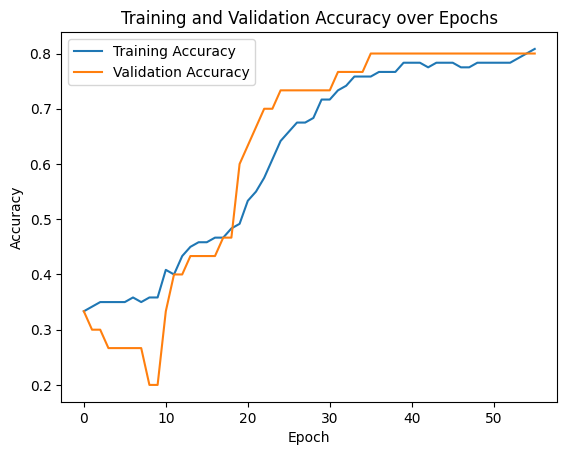

In [12]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy over Epochs')

Text(0.5, 1.0, 'Training and Validation Loss over Epochs')

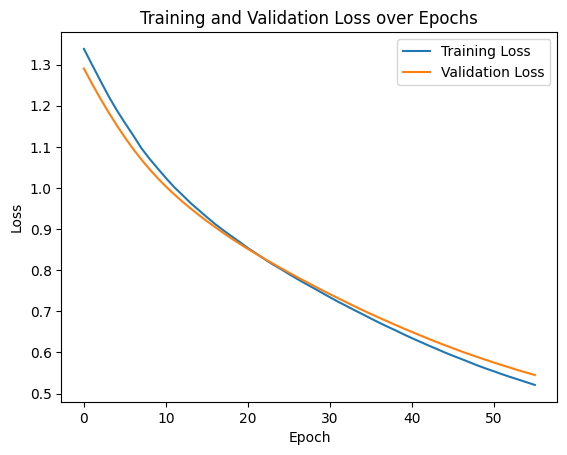

In [13]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss over Epochs')

In [14]:
# Predict class labels for validation set
y_pred = model.predict(X_val)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


array([[0.4480917 , 0.44304925, 0.10885905],
       [0.11999629, 0.31127873, 0.5687249 ],
       [0.20825604, 0.58159333, 0.21015058],
       [0.17449571, 0.6082241 , 0.21728018],
       [0.49872416, 0.40536076, 0.09591509],
       [0.13068597, 0.23383346, 0.6354806 ],
       [0.604673  , 0.32154992, 0.07377711],
       [0.53466916, 0.3260657 , 0.13926522],
       [0.06311739, 0.25935256, 0.67753005],
       [0.27012405, 0.40304932, 0.3268267 ],
       [0.02567705, 0.16709365, 0.80722934],
       [0.03017337, 0.22391093, 0.74591565],
       [0.04419119, 0.24103802, 0.71477085],
       [0.13308382, 0.2539928 , 0.6129233 ],
       [0.5648526 , 0.31926346, 0.11588394],
       [0.5520103 , 0.32206312, 0.12592663],
       [0.58500224, 0.28770798, 0.12728982],
       [0.1911849 , 0.51063675, 0.29817834],
       [0.1690774 , 0.31919658, 0.511726  ],
       [0.1349293 , 0.3371401 , 0.5279306 ],
       [0.5817752 , 0.3041975 , 0.11402737],
       [0.0298435 , 0.21865097, 0.7515055 ],
       [0.

In [15]:
y_pred_classes = np.argmax(y_pred, axis=1)

In [16]:
y_pred_classes

array([0, 2, 1, 1, 0, 2, 0, 0, 2, 1, 2, 2, 2, 2, 0, 0, 0, 1, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 0, 2, 0], dtype=int64)

In [17]:
# Evaluating the Model with Classification Report and Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix

# Generate a classification report
print("Classification Report:\n", classification_report(y_val, y_pred_classes, target_names=iris.target_names))

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.40      0.57        10
   virginica       0.62      1.00      0.77        10

    accuracy                           0.80        30
   macro avg       0.88      0.80      0.78        30
weighted avg       0.88      0.80      0.78        30



---
- **Precision**: How many selected items are **relevant**?
- **Recall**: How many **relevant items** are **selected**?
- **F1 Score**: The **balance** between **precision and recall**.
- **Support**: The **number of true instances** for each label.
---

Text(0.5, 1.0, 'Confusion Matrix')

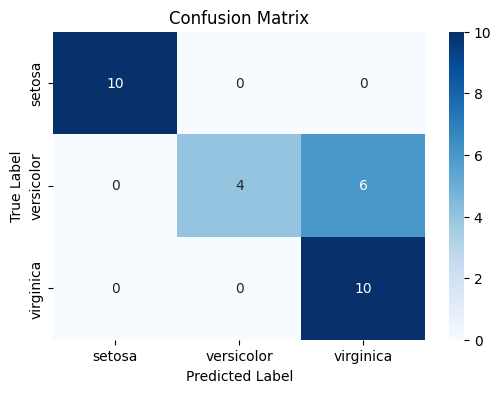

In [18]:
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

---
- **Diagonal values** indicate **correct predictions**.
- **Off-diagonal values** indicate **misclassifications**.
---

---

## **Summary**

### **1. Dataset Preparation and Normalization**
- The **Iris dataset** contains **4 features** (sepal length, sepal width, petal length, petal width) to classify **3 types of iris flowers**.
- **Normalization** scales the feature values to have **zero mean** and **unit variance**, which helps the **neural network** learn more efficiently.

---

### **2. Neural Network Architecture**
- **Input Layer**: Takes **4 features** as input (`input_shape=(4,)`).
- **Hidden Layer**: 
  - **16 neurons** with **ReLU activation** (`relu`).
  - The **ReLU function** introduces **non-linearity**, allowing the network to learn **complex patterns**.
- **Output Layer**:
  - **3 neurons**, each representing one of the **3 classes** of iris flowers.
  - **Softmax activation** (`softmax`) converts the **outputs to probabilities**, which are useful for **multi-class classification**.

---

### **3. Model Compilation**
- **Loss Function**: `sparse_categorical_crossentropy` is ideal for **multi-class classification** where labels are **integers** (`0`, `1`, `2`).
- **Optimizer**: `adam` automatically adjusts the **learning rate** during training, often providing **faster convergence**.
- **Metrics**: `accuracy` shows the **proportion of correct predictions**.

---

### **4. Training the Model**
- The model is trained for **50 epochs**, meaning it goes through the **entire dataset 50 times**.
- During each epoch, the model is also validated on the **20% validation set** to monitor **generalization performance**.

---

### **5. Evaluation**
- The `model.evaluate()` function calculates the **loss** and **accuracy** on the **validation set**.
- An accuracy of **0.93** means the model **correctly predicts** the flower species **93% of the time**.

---

### **6. Visualization**
- The **accuracy plot** helps identify whether the model is **improving over time**.
- If **validation accuracy** is much **lower** than **training accuracy**, it could indicate **overfitting**.

---